# Intro IA - 2coCEIA2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funciones y Pre-procesamiento del dataset:


In [17]:
import sys  
sys.path.insert(0, r'C:\Users\MarianelSarabia\Downloads\ia')

In [27]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    @staticmethod
    def _build_dataset(path):
        structure = [('income', np.float),
                     ('happiness', np.float)]

        with open(path, encoding="utf8") as data_csv:
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]))
                        for i, line in enumerate(data_csv))
            data = np.fromiter(data_gen, structure)

        return data

    def split(self, percentage):  # 0.8
        X = self.dataset['income']
        y = self.dataset['happiness']

        # X.shape[0] -> 10 (filas)

        permuted_idxs = np.random.permutation(X.shape[0])
        # 2,1,3,4,6,7,8,5,9,0

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
        # permuted_idxs[0:8]
        # [2,1,3,4,5,6,7,8,5]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
        # [9,0]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test


In [31]:
dataset = Data(r'clase_8_dataset.csv')
X_train, X_test, y_train, y_test = dataset.split(0.8)

In [36]:
X_train.shape, X_test.shape

((400,), (100,))

In [35]:
y_train.shape, y_test.shape

((400,), (100,))

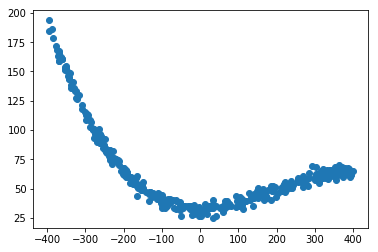

In [37]:
plt.scatter(X_train, y_train+15);

## Regresión polinómica para hacer “fit” sobre la nube de puntos del train
Para este ejercicio, se desea utilizar la fórmula cerrada de la optimización polinómica. El modelo es de la forma y = [Wn … W0] * [X^n    X^(n-1)    …    1]. 

Para n = 1 (modelo lineal con ordenada al origen), hacer un fit del modelo utilizando K-FOLDS. Para K-FOLDS partir el train dataset en 5 partes iguales, utilizar 4/5 para entrenar y 1/5 para validar. Informar el mejor modelo obtenido y el criterio utilizado para elegir dicho modelo (dejar comentarios en el código).

Repetir el punto (a), para n = {2,3,4}. Computar el error de validación y test del mejor modelo para cada n.

Elegir el polinomio que hace mejor fit sobre la nube de puntos y explicar el criterio seleccionado (dejar comentarios en el código). 

Graficar el polinomio obtenido y el dataset de test. 


In [43]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented


class ConstantModel(BaseModel):

    def fit(self, X, Y):
        W = Y.mean()
        self.model = W

    def predict(self, X):
        return np.ones(len(X)) * self.model


class LinearRegression(BaseModel):

    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return self.model * X


class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        return X_expanded.dot(self.model)


In [44]:
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

In [81]:
def k_folds(X_train, y_train, k=5):
    l_regression = LinearRegression()
    error = MSE()

    chunk_size = int(len(X_train) / k)
    mse_list = []
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression.fit(new_X_train, new_y_train)
        prediction = l_regression.predict(new_X_valid)
        mse_list.append(error(new_y_valid, prediction))

    mean_MSE = np.mean(mse_list)

    return mean_MSE

In [101]:
k_folds(X_train, y_train, k=5)

3306.842007250742

In [109]:
mse = MSE()

In [110]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_y_hat = linear_regression.predict(X_test)
lr_mse = mse(y_test, lr_y_hat)

In [111]:
linear_regression.model

-0.08826267940529046

In [112]:
lr_mse

3426.712046682118

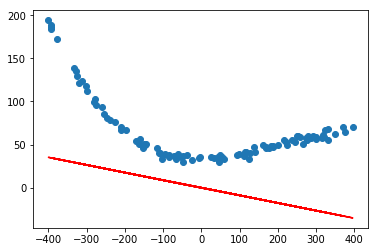

In [117]:
plt.scatter(X_test, y_test +15 )
plt.plot(X_test, lr_y_hat, 'r')

In [126]:
X_train2 = np.power(X_train, 2)
X_train3 = np.power(X_train, 3)
X_train4 = np.power(X_train, 4)

X_test2 = np.power(X_test, 2)
X_test3 = np.power(X_test, 3)
X_test4 = np.power(X_test, 4)

In [127]:
train = [X_train, X_train2, X_train3, X_train4]
test = [X_test, X_test2, X_test3, X_test4]

In [ ]:
linear_regression = LinearRegression()
mse_list = []

    for i,j in zip(train, test):
        linear_regression.fit(i, y_train)
        lr_y_hat = linear_regression.predict(j)
        lr_mse = mse(y_test, lr_y_hat)
        print(lr_mse)